In [388]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

dataset = 'admit.csv'
admitData = pd.read_csv(dataset)

X = admitData.iloc[:, 1:7] # select columns 1-7 with all rows
y = admitData.iloc[:, 8] # select 8th column


# test data
admitData

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = KNeighborsRegressor(n_neighbors=19, metric='euclidean')
model.fit(X_train, y_train)

# test prediction
prediction = model.predict(X_test)
prediction

array([0.67473684, 0.78947368, 0.93052632, 0.69578947, 0.54105263,
       0.81421053, 0.82947368, 0.80473684, 0.70578947, 0.84368421,
       0.66      , 0.64315789, 0.72052632, 0.53842105, 0.69157895,
       0.69473684, 0.52263158, 0.53684211, 0.55684211, 0.71789474,
       0.92684211, 0.78263158, 0.90684211, 0.71368421, 0.53105263,
       0.65894737, 0.92894737, 0.71421053, 0.71      , 0.75473684,
       0.77947368, 0.68631579, 0.68473684, 0.60684211, 0.63947368,
       0.81052632, 0.65578947, 0.68      , 0.80842105, 0.71210526,
       0.92947368, 0.77578947, 0.68052632, 0.76315789, 0.64526316,
       0.68263158, 0.92842105, 0.88526316, 0.48368421, 0.67368421,
       0.77631579, 0.88105263, 0.53368421, 0.93736842, 0.77526316,
       0.84421053, 0.81789474, 0.70263158, 0.69631579, 0.68473684,
       0.93684211, 0.92684211, 0.48421053, 0.68157895, 0.70210526,
       0.77947368, 0.72736842, 0.67157895, 0.65105263, 0.54578947,
       0.93052632, 0.78      , 0.66526316, 0.69789474, 0.65315

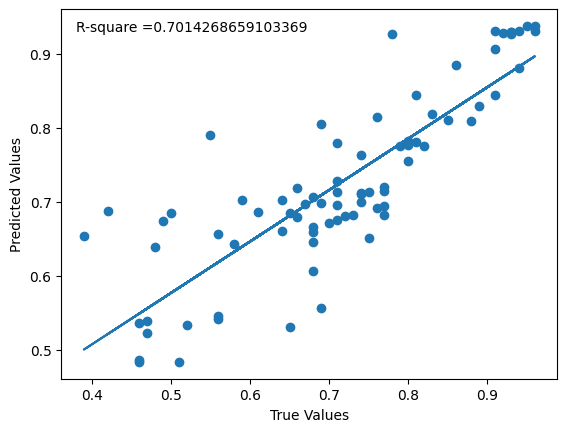

In [390]:
a, b = np.polyfit(y_test, prediction, 1)

r2 = r2_score(y_test, prediction)

plt.scatter(y_test, prediction)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot(y_test, a*y_test+b)
plt.text(0.38, 0.93, 'R-square =' + str(r2))

plt.show()

In [391]:
# calculate R-squared
print("Accuracy:", r2)

Accuracy: 0.7014268659103369


In [392]:
# predict Mean squared error (MSE)
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)

MSE: 0.006310972991689751


In [393]:
# predict Mean absolute error (MAE)
mae = mean_absolute_error(y_test, prediction)
print("MAE:", mae)

MAE: 0.05570394736842106


In [394]:
# predict Root mean squared error (RMSE)
rmse = mean_squared_error(y_test, prediction, squared=False)
print("RMSE:", rmse)

RMSE: 0.0794416326096698


In [395]:
# function for precision at k
def precision_at_k(y_test, y_pred, k):

    # sort the prediction values by probability in descending order
    sorted_pred_values = np.argsort(y_pred)[::-1] 

    # select the top k sorted prediction values
    top_k_sorted_pred_values = sorted_pred_values[:k]

    # precision at k
    true_positives = np.sum(y_test[top_k_sorted_pred_values])
    precision_at_k = true_positives / k

    return precision_at_k

# precision at k=5
precision_at_5 = precision_at_k(y_test, prediction, k=5)
print("precision_at_k=5: ", precision_at_5)

KeyError: '[53, 77, 2, 70] not in index'